# Tutorial 6: Caesium-133 D Line

Caesium is a heavy atom with hyperfine structure. Modelling of the <sup>133</sup>Cs D line is shown in this tutorial using the `LASED` library.

In [1]:
import LASED as las
import plotly.graph_objects as go
import time
import numpy as np

from IPython.display import Image  # To display images in Jupyter notebook

The data for Caesium can be accessed [here](https://steck.us/alkalidata/cesiumnumbers.1.6.pdf). The 6$^2$S$_{1/2}$ to the 6$^2$P$_{3/2}$ transition will be modelled here with F' = 4 to the F = 5 level as the resonant transition and all other terms will be detuned from this resonance. A level diagram of the system being modelled is shown below.

![CsLevelDiagram](LevelDiagrams/Cs-133-6S1_2to6P3_2.jpg)

## Setting up the System

In [2]:
# 6^2S_{1/2} -> 6^2P_{3/2}
wavelength_cs = 852.356e-9  # Wavelength in nm
w_e = las.angularFreq(wavelength_cs)
tau_cs = 30.473 # in ns

I_cs = 7/2  # Isospin for sodium 
PI = np.pi

# Energy Splittings
w1 = 9.192631770*2*PI # Splitting of 6^2S_{1/2}(F' = 3) -> (F' = 4) in Grad/s (Exact due to definition of the second)
w2 = 0.15121*2*PI  # Splitting between 6^2P_{3/2} F = 2 and F = 3 in Grad/s
w3 = 0.20124*2*PI  # Splitting between 6^2P_{3/2} F = 3 and F = 4 in Grad/s
w4 = 0.251*2*PI  # Splitting between 6^2P_{3/2} F = 4 and F = 5 in Grad/s

# Detunings
w_Fp3 = -1*w1
w_F2 = w_e-(w4+w3+w2)
w_F3 = w_e-(w4+w3)
w_F4 = w_e-w4
w_F5 = w_e

# Create states 
# 6^2S_{1/2}
Fp3 = las.generateSubStates(label_from = 1, w = w_Fp3, L = 0, S = 1/2, I = I_cs, F = 3)
Fp4 = las.generateSubStates(label_from = 8, w = 0, L = 0, S = 1/2, I = I_cs, F = 4)

# 5^2P_{3/2}
F2 = las.generateSubStates(label_from = 17, w = w_F2, L = 1, S = 1/2, I = I_cs, F = 2)
F3 = las.generateSubStates(label_from = 22, w = w_F3, L = 1, S = 1/2, I = I_cs, F = 3)
F4 = las.generateSubStates(label_from = 29, w = w_F4, L = 1, S = 1/2, I = I_cs, F = 4)
F5 = las.generateSubStates(label_from = 38, w = w_F5, L = 1, S = 1/2, I = I_cs, F = 5)

# Declare excited and ground states
G_cs = Fp3 + Fp4
E_cs = F2 + F3 + F4 + F5

# Laser parameters
intensity_cs = 50 # mW/mm^-2
Q_cs = [0]

# Simulation parameters
start_time = 0
stop_time = 500 # in ns
time_steps = 501
time_cs = np.linspace(start_time, stop_time, time_steps)

Create a `LaserAtomSystem` object and time evolve the system using `timeEvolution()`.

In [3]:
cs_system = las.LaserAtomSystem(E_cs, G_cs, tau_cs, Q_cs, wavelength_cs, laser_intensity = intensity_cs)
tic = time.perf_counter()
cs_system.timeEvolution(time_cs)
toc = time.perf_counter()
print(f"The code finished in {toc-tic:0.4f} seconds")

Populating ground states equally as the initial condition.
The code finished in 8568.3967 seconds


## Saving and Plotting

In [4]:
cs_system.saveToCSV(f"cs133piExcitationI={intensity_cs}.csv")

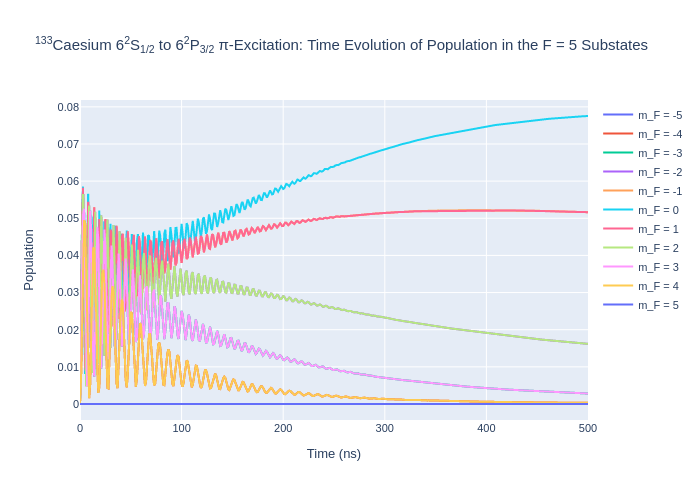

In [5]:
rho_to_plot = [ [abs(rho) for rho in cs_system.Rho_t(s, s)] for s in F5]

fig_csF5 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_csF5.add_trace(go.Scatter(x = time_cs, 
                                y = rho,
                                name = f"m_F = {F5[i].m}",
                               mode = 'lines'))

fig_csF5.update_layout(title = "<sup>133</sup>Caesium 6<sup>2</sup>S<sub>1/2</sub> to 6<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F = 5 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_csF5.write_image(f"SavedPlots/CsF=5I={intensity_cs}.png")
Image(f"SavedPlots/CsF=5I={intensity_cs}.png")

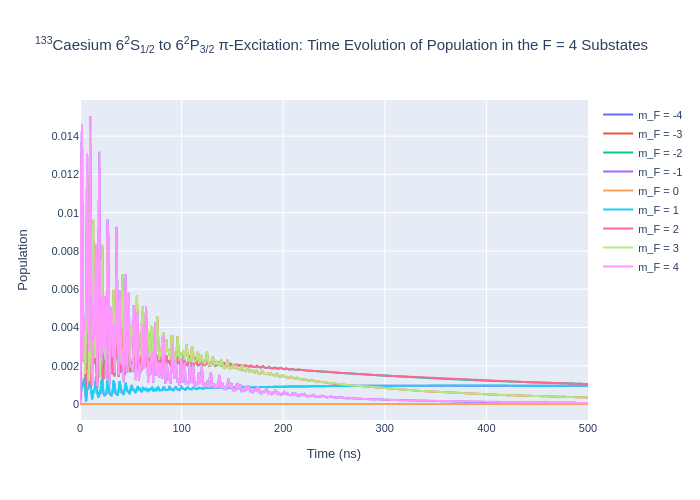

In [6]:
rho_to_plot = [ [abs(rho) for rho in cs_system.Rho_t(s, s)] for s in F4]

fig_csF4 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_csF4.add_trace(go.Scatter(x = time_cs, 
                                y = rho,
                                name = f"m_F = {F4[i].m}",
                               mode = 'lines'))

fig_csF4.update_layout(title = "<sup>133</sup>Caesium 6<sup>2</sup>S<sub>1/2</sub> to 6<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F = 4 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_csF4.write_image(f"SavedPlots/CsF=4I={intensity_cs}.png")
Image(f"SavedPlots/CsF=4I={intensity_cs}.png")

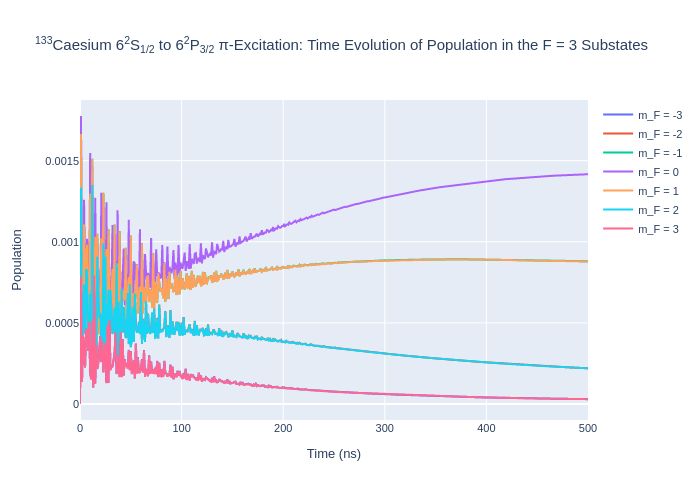

In [7]:
rho_to_plot = [ [abs(rho) for rho in cs_system.Rho_t(s, s)] for s in F3]

fig_csF3 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_csF3.add_trace(go.Scatter(x = time_cs, 
                                y = rho,
                                name = f"m_F = {F3[i].m}",
                               mode = 'lines'))

fig_csF3.update_layout(title = "<sup>133</sup>Caesium 6<sup>2</sup>S<sub>1/2</sub> to 6<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F = 3 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_csF3.write_image(f"SavedPlots/CsF=3I={intensity_cs}.png")
Image(f"SavedPlots/CsF=3I={intensity_cs}.png")

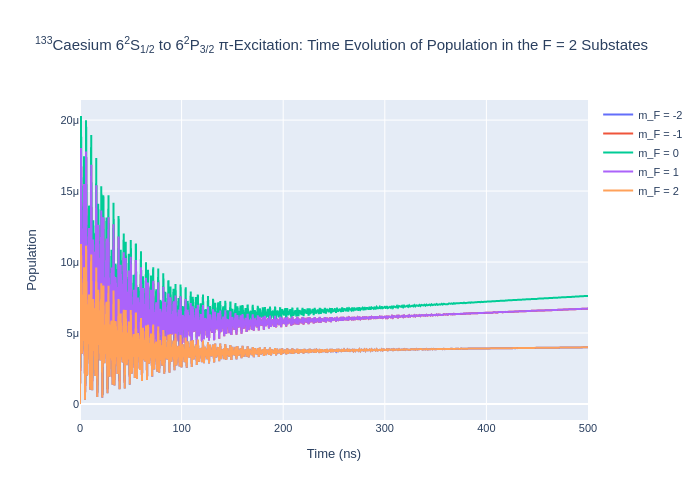

In [8]:
rho_to_plot = [ [abs(rho) for rho in cs_system.Rho_t(s, s)] for s in F2]

fig_csF2 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_csF2.add_trace(go.Scatter(x = time_cs, 
                                y = rho,
                                name = f"m_F = {F2[i].m}",
                               mode = 'lines'))

fig_csF2.update_layout(title = "<sup>133</sup>Caesium 6<sup>2</sup>S<sub>1/2</sub> to 6<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F = 2 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_csF2.write_image(f"SavedPlots/CsF=2I={intensity_cs}.png")
Image(f"SavedPlots/CsF=2I={intensity_cs}.png")

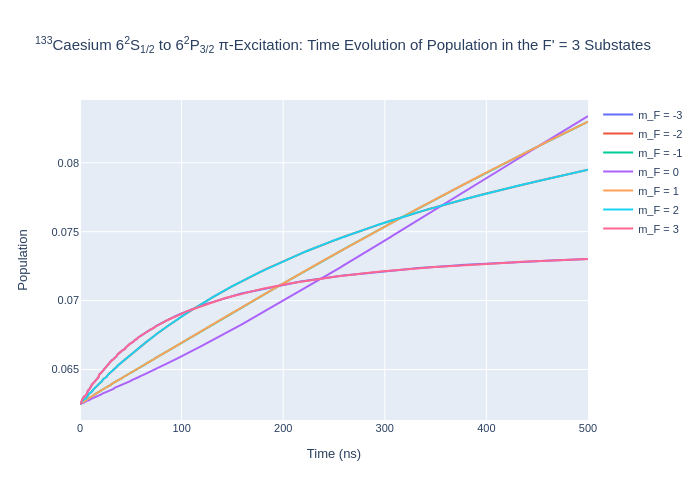

In [9]:
rho_to_plot = [ [abs(rho) for rho in cs_system.Rho_t(s, s)] for s in Fp3]

fig_csFp3 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_csFp3.add_trace(go.Scatter(x = time_cs, 
                                y = rho,
                                name = f"m_F = {Fp3[i].m}",
                               mode = 'lines'))

fig_csFp3.update_layout(title = "<sup>133</sup>Caesium 6<sup>2</sup>S<sub>1/2</sub> to 6<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F' = 3 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_csFp3.write_image(f"SavedPlots/CsFp=3I={intensity_cs}.png")
Image(f"SavedPlots/CsFp=3I={intensity_cs}.png")

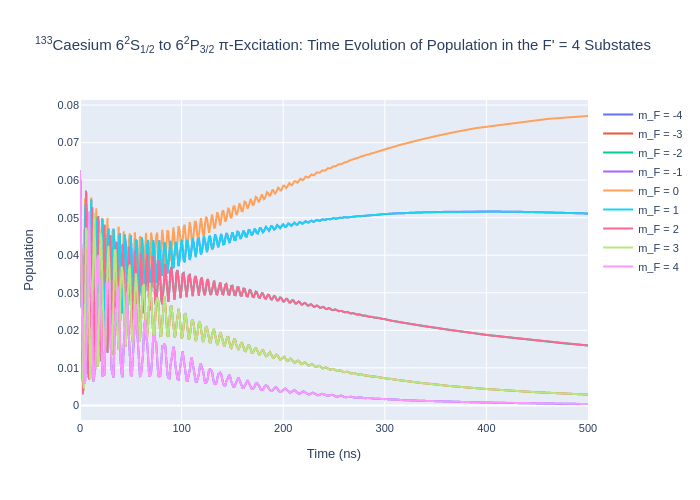

In [10]:
rho_to_plot = [ [abs(rho) for rho in cs_system.Rho_t(s, s)] for s in Fp4]

fig_csFp4 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_csFp4.add_trace(go.Scatter(x = time_cs, 
                                y = rho,
                                name = f"m_F = {Fp4[i].m}",
                               mode = 'lines'))

fig_csFp4.update_layout(title = "<sup>133</sup>Caesium 6<sup>2</sup>S<sub>1/2</sub> to 6<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F' = 4 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_csFp4.write_image(f"SavedPlots/CsFp=4I={intensity_cs}.png")
Image(f"SavedPlots/CsFp=4I={intensity_cs}.png")